In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

/Users/sam/opt/anaconda3/envs/prophet_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
mauna_df = pd.read_csv('mauna_loa.csv', skiprows=56)
mauna_df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
777,2022,12,2022.9583,418.95,419.66,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.12,31,0.40,0.14
779,2023,2,2023.1250,420.41,419.46,25,0.62,0.24
780,2023,3,2023.2083,421.00,419.53,31,0.72,0.25


In [3]:

mauna_df['date'] = pd.to_datetime(mauna_df['year'].astype(str) + '-' + mauna_df['month'].astype(str) + '-01')
mauna_df = mauna_df.drop(['year','month','decimal date','deseasonalized','ndays','sdev','unc'], axis=1)
mauna_df = mauna_df.rename(columns={'date':'ds', 'average': 'y'})
mauna_df = mauna_df.set_index('ds').reset_index()
mauna_df

,ds,y
0,1958-03-01,315.70
1,1958-04-01,317.45
2,1958-05-01,317.51
3,1958-06-01,317.24
4,1958-07-01,315.86
...,...,...
777,2022-12-01,418.95
778,2023-01-01,419.47
779,2023-02-01,420.41
780,2023-03-01,421.00


In [4]:
model = Prophet()
model.fit(mauna_df)

16:29:21 - cmdstanpy - INFO - Chain [1] start processing
16:29:21 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future = model.make_future_dataframe(periods=12 * 25, freq='MS')
forecast = model.predict(future)

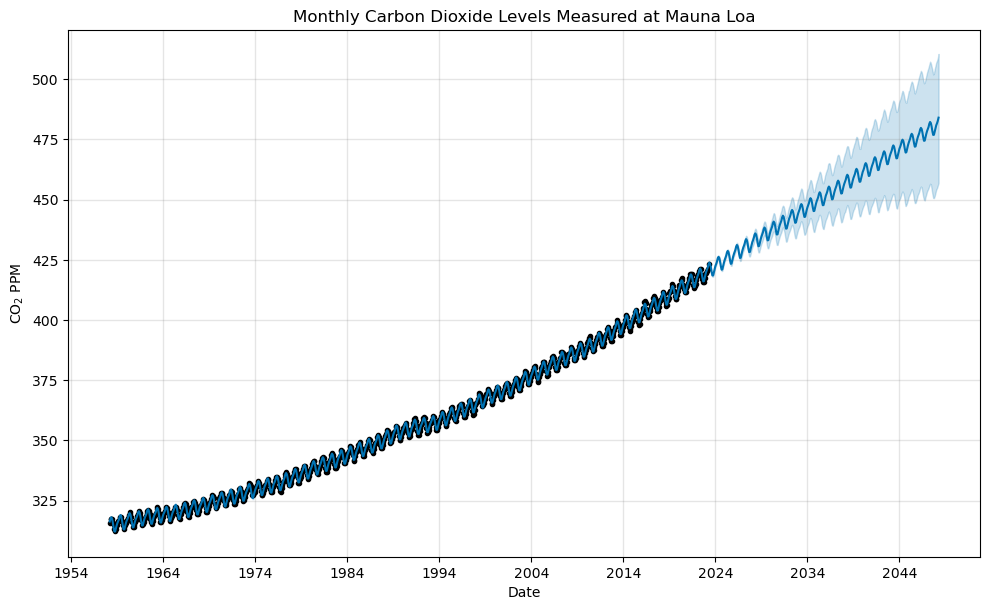

In [86]:
fig = model.plot(forecast, xlabel='Date',ylabel=r'CO$_2$ PPM')
plt.title('Monthly Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

In [87]:
forecast.tail(10).T

,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081
ds,2047-07-01 00:00:00,2047-08-01 00:00:00,2047-09-01 00:00:00,2047-10-01 00:00:00,2047-11-01 00:00:00,2047-12-01 00:00:00,2048-01-01 00:00:00,2048-02-01 00:00:00,2048-03-01 00:00:00,2048-04-01 00:00:00
trend,479.614557,479.821051,480.027545,480.227378,480.433871,480.633704,480.840198,481.046692,481.239864,481.446357
yhat_lower,454.316675,452.291354,450.699106,450.655258,451.552458,452.853955,454.207438,454.836189,455.79819,456.935551
yhat_upper,505.218914,503.804325,502.009099,502.505065,504.24657,505.584657,506.981168,507.711575,508.728411,510.5311
trend_lower,453.75658,453.855634,453.933091,454.003888,454.081345,454.152142,454.229599,454.307933,454.369211,454.443812
trend_upper,504.71916,505.045154,505.35827,505.664652,505.996586,506.320844,506.630943,506.93292,507.196866,507.542973
additive_terms,0.697857,-1.485778,-3.151985,-3.276988,-2.075458,-0.85524,0.096706,0.711908,1.472294,2.618885
additive_terms_lower,0.697857,-1.485778,-3.151985,-3.276988,-2.075458,-0.85524,0.096706,0.711908,1.472294,2.618885
additive_terms_upper,0.697857,-1.485778,-3.151985,-3.276988,-2.075458,-0.85524,0.096706,0.711908,1.472294,2.618885
yearly,0.697857,-1.485778,-3.151985,-3.276988,-2.075458,-0.85524,0.096706,0.711908,1.472294,2.618885


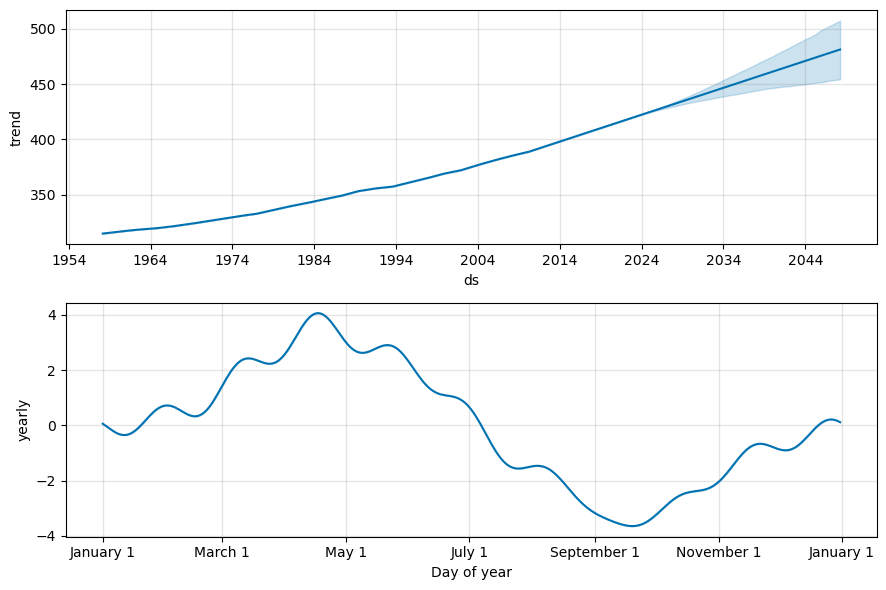

In [88]:
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
mauna_df = pd.read_csv('mauna_loa_weekly.csv', skiprows=51)
mauna_df

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.39
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.05
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.59
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.64
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2553,2023,4,23,2023.3082,424.07,7,420.19,399.32,140.94
2554,2023,4,30,2023.3274,423.98,7,420.18,399.74,140.62
2555,2023,5,7,2023.3466,424.29,7,420.75,399.74,140.79
2556,2023,5,14,2023.3658,423.39,7,421.20,400.14,139.86


In [6]:
mauna_df = mauna_df[mauna_df['average'] > 0]

In [7]:

mauna_df['date'] = pd.to_datetime(mauna_df['year'].astype(str) + '-' + mauna_df['month'].astype(str) + '-' + mauna_df['day'].astype(str))
mauna_df = mauna_df.drop(['year','month','day','decimal','10 years ago','1 year ago','increase since 1800','ndays'], axis=1)
mauna_df = mauna_df.rename(columns={'date':'ds', 'average': 'y'})
mauna_df = mauna_df.set_index('ds').reset_index()
mauna_df

/var/folders/r4/fdchq33x2vg7z1_7dstrhrn80000gn/T/ipykernel_18428/1894423279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mauna_df['date'] = pd.to_datetime(mauna_df['year'].astype(str) + '-' + mauna_df['month'].astype(str) + '-' + mauna_df['day'].astype(str))


,ds,y
0,1974-05-19,333.37
1,1974-05-26,332.95
2,1974-06-02,332.35
3,1974-06-09,332.20
4,1974-06-16,332.37
...,...,...
2535,2023-04-23,424.07
2536,2023-04-30,423.98
2537,2023-05-07,424.29
2538,2023-05-14,423.39


In [8]:
model = Prophet()
model.fit(mauna_df)

16:29:28 - cmdstanpy - INFO - Chain [1] start processing
16:29:29 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods= 52 * 10, freq='W')
forecast = model.predict(future)

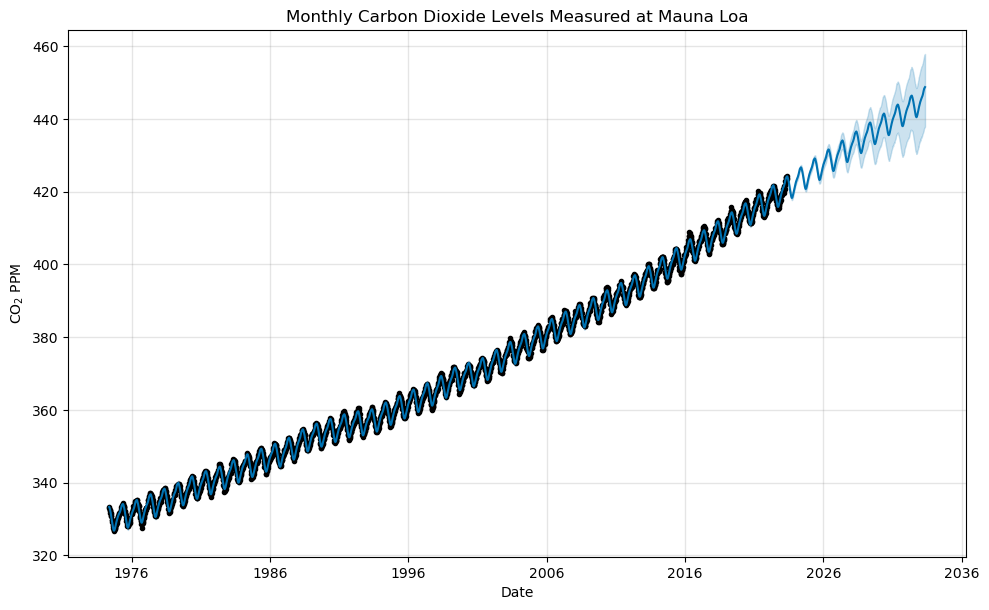

In [23]:
fig = model.plot(forecast, xlabel='Date',ylabel=r'CO$_2$ PPM')
plt.title('Monthly Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

In [24]:
forecast.tail(10).T

,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059
ds,2033-03-06 00:00:00,2033-03-13 00:00:00,2033-03-20 00:00:00,2033-03-27 00:00:00,2033-04-03 00:00:00,2033-04-10 00:00:00,2033-04-17 00:00:00,2033-04-24 00:00:00,2033-05-01 00:00:00,2033-05-08 00:00:00
trend,445.153205,445.200467,445.247729,445.294991,445.342253,445.389516,445.436778,445.48404,445.531302,445.578564
yhat_lower,435.928578,435.971617,436.339533,436.437507,436.750738,437.293463,437.379601,437.590371,437.66457,437.7974
yhat_upper,455.10964,455.428846,455.85113,456.272918,456.64987,457.039919,457.330232,457.565177,457.544688,457.809264
trend_lower,434.422054,434.417402,434.432829,434.462455,434.49208,434.521817,434.537589,434.552019,434.565108,434.578198
trend_upper,453.929626,454.003554,454.077481,454.151408,454.223105,454.285764,454.355691,454.421838,454.487941,454.554045
additive_terms,1.280759,1.491146,1.745812,2.053306,2.383628,2.67147,2.864095,2.967396,3.036051,3.111744
additive_terms_lower,1.280759,1.491146,1.745812,2.053306,2.383628,2.67147,2.864095,2.967396,3.036051,3.111744
additive_terms_upper,1.280759,1.491146,1.745812,2.053306,2.383628,2.67147,2.864095,2.967396,3.036051,3.111744
yearly,1.280759,1.491146,1.745812,2.053306,2.383628,2.67147,2.864095,2.967396,3.036051,3.111744


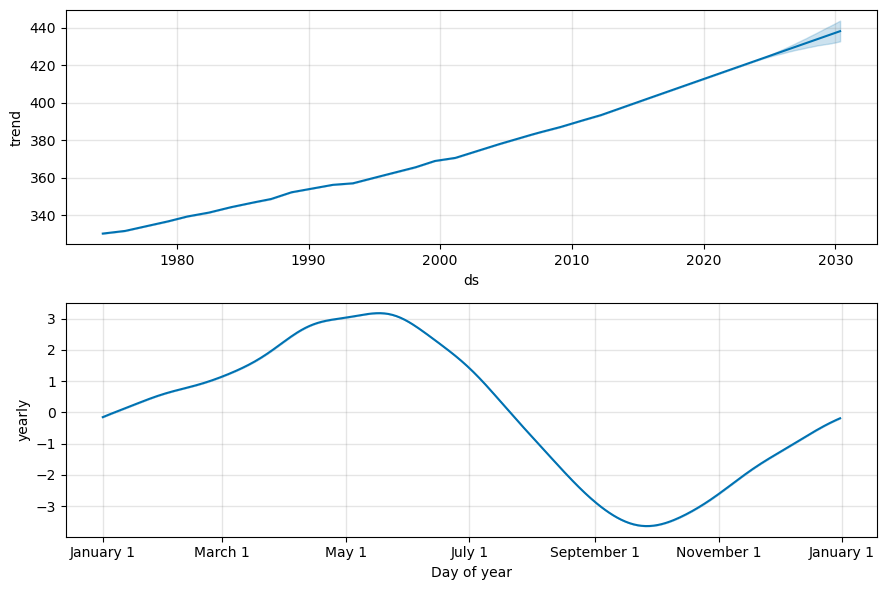

In [106]:
fig2 = model.plot_components(forecast)
plt.show()